# Fit Model


In [156]:
import pandas as pd
import mlutils
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [157]:
# column names
feature_col = "features" # feature vector
value_col = "foldType" # fold type to be predicted

### Read data set with fold type classifications and feature vectors

In [158]:
df = pd.read_json("./features.json")

In [159]:
print("Total number of data:", df.shape[0])
df.head(2)

Total number of data: 10713


,Exptl.,FreeRvalue,R-factor,alpha,beta,coil,features,foldType,length,ngram,pdbChainId,resolution,secondary_structure,sequence
0,XRAY,0.29,0.16,0.345455,0.206061,0.448485,"[-0.2495497023, 0.0835027742, -0.2646374465, 0...",alpha+beta,330,"[MK, KT, TA, AY, YI, IA, AK, KQ, QR, RQ, QI, I...",12AS.A,2.2,CCCCHHHHHHHHHHHHHHHHHHHHHHHCEEECCCCSEEETTSSCSC...,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
1,XRAY,0.26,0.19,0.469945,0.046448,0.483607,"[-0.5319030737, 0.1313498868, -0.5293261122, 0...",alpha,366,"[SR, RM, MP, PS, SP, PP, PM, MP, PV, VP, PP, P...",16VP.A,2.1,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...


## Balance dataset

This dataset if highly imbalanced. The alpha+beta class is over-represented and the beta class is underrepresented.

In [160]:
df[value_col].value_counts()

alpha+beta    7030
alpha         2810
beta           873
Name: foldType, dtype: int64

Here we balance the dataset by downsampling the over-represented classes. Samples are randomly choose from the over-represented classes. We use a fixed random number seed so the downsampling step is reproducible.

In [161]:
df = mlutils.downsample(df, value_col, seed=13)
df[value_col].value_counts()

alpha         873
alpha+beta    873
beta          873
Name: foldType, dtype: int64

## Split dataset into a training and test set

In [162]:
train, test = train_test_split(df, test_size=0.33, random_state=13, stratify=df[value_col])
print("Train set size:", train.shape[0])
print(train[value_col].value_counts())
print()
print("Test set size:", test.shape[0])
print(test[value_col].value_counts())
train.head(2)

Train set size: 1754
alpha+beta    585
alpha         585
beta          584
Name: foldType, dtype: int64

Test set size: 865
beta          289
alpha+beta    288
alpha         288
Name: foldType, dtype: int64


,Exptl.,FreeRvalue,R-factor,alpha,beta,coil,features,foldType,length,ngram,pdbChainId,resolution,secondary_structure,sequence
9427,XRAY,0.21,0.17,0.000000,0.423077,0.576923,"[0.2298227586, 0.296605096, 0.0046208764000000...",beta,104,"[SE, ER, RP, PS, SP, PP, PV, VN, NL, LT, TS, S...",4O00.A,1.853,CCCCCCCEEEEEECCCSSEEEEEEECCSCCTTSCCCEEEEEEEETT...,SERPSPPVNLTSSDQTQSSVQLKWEPPLKDGGSPILGYIIERCEEG...
13457,XRAY,0.29,0.23,0.761905,0.027778,0.210317,"[0.9048841632, -0.12931998690000002, 0.4223410...",alpha,252,"[MS, SN, NM, MK, KK, KD, DT, TN, NE, EI, IV, V...",6BR8.A,2.300,CCCCHHHHHHHHHHHHHHHHHHHHHHTCSSHHHHHHHHHHTHHHHH...,MSNMKKDTNEIVQDLKKILGIVSLIKSANNEHQAYKILMENNSFII...
7764,XRAY,0.20,0.14,0.712042,0.010471,0.277487,"[-0.3201574277, 0.23937715580000002, -0.058413...",alpha,191,"[GH, HM, MV, VS, SV, VA, AA, AG, GD, DK, KP, P...",4ACI.B,1.650,CCCCCCCCCCCCCCHHHHHHHHHHHHHHHHTTTTCCHHHHHHHHCC...,GHMVSVAAGDKPTNSRQEILEGARRCFAEHGYEGATVRRLEEATGK...
3184,XRAY,0.19,0.15,0.038095,0.419048,0.542857,"[0.0688181591, 0.2881335996, 0.2057994232, -0....",beta,105,"[GP, PL, LG, GS, SW, WV, VI, IP, PP, PI, IS, S...",2OMZ.B,1.600,CCSTTEECCCCCEESSCCSSSSEEEEECEEGGGGSSCCEEEEEEBT...,GPLGSWVIPPISCPENEKGPFPKNLVQIKSNKDKEGKVFYSITGQG...
4276,XRAY,0.18,0.17,0.042301,0.362098,0.595601,"[-0.25774497150000003, 0.28370287110000003, -0...",beta,591,"[AA, AR, RQ, QM, ME, EA, AL, LN, NR, RG, GL, L...",2ZUX.B,1.320,CCEECCCCCCCCEEEECSSSEEEECCBCTTCCTTCEEEEEETTEEC...,AARQMEALNRGLVAVKTDGGIFVSWRFLGTENASVLFNVYRDGQKL...


## Train a classifier

In [163]:
classifier = svm.SVC()
#classifier = LogisticRegression()
#classifier = RandomForestClassifier()

classifier.fit(train[feature_col].tolist(), train[value_col].tolist())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Make prediction for test set

In [164]:
predicted = classifier.predict(test[feature_col].tolist())
expected = test[value_col].tolist()

## Calculate metrics for test set

Classification metrics:

             precision    recall  f1-score   support

      alpha       0.81      0.67      0.73       288
 alpha+beta       0.63      0.69      0.66       288
       beta       0.77      0.83      0.80       289

avg / total       0.74      0.73      0.73       865



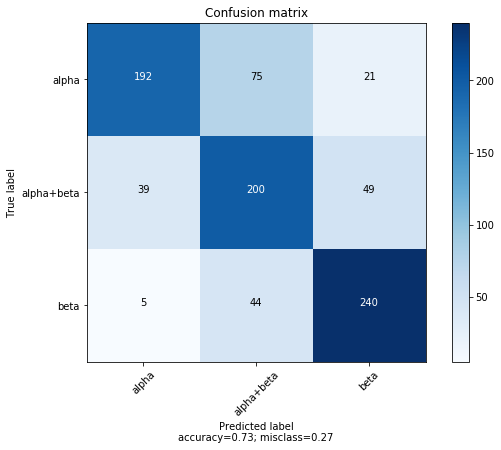

In [165]:
cm = metrics.confusion_matrix(expected, predicted)
print("Classification metrics:\n")
print(metrics.classification_report(expected, predicted))
mlutils.plot_confusion_matrix(cm, classifier.classes_, normalize=False)